In [3]:
import pandas as pd
import geopandas as gpd
import os
from pathlib import Path

In [5]:
# ========================================================================
# ENSURE THAT YOU MODIFY THESE PATHS TO MATCH YOUR LOCAL SETUP
# =========================================================================
DIR_DATA = Path.cwd().parents[1] / "data"

# Dir
DIR_GEOSPATIAL = DIR_DATA / "geospatial"

# Districts
FILE_DISTRICTS_SHP = DIR_GEOSPATIAL / "adm-bounds/geoBoundaries-RWA-ADM2-all/geoBoundaries-RWA-ADM2_simplified.shp"

# buildings
FILE_BUILDINGS_GEOJSON = DIR_GEOSPATIAL / "osm-buildings-sampled.geojson"


# LOAD THE GIS FILES USING GEOPANDAS

In [6]:
gdf_districts = gpd.read_file(FILE_DISTRICTS_SHP)
gdf_buildings = gpd.read_file(FILE_BUILDINGS_GEOJSON)

# VISUALIZE AND OVERLAY GIS DATA

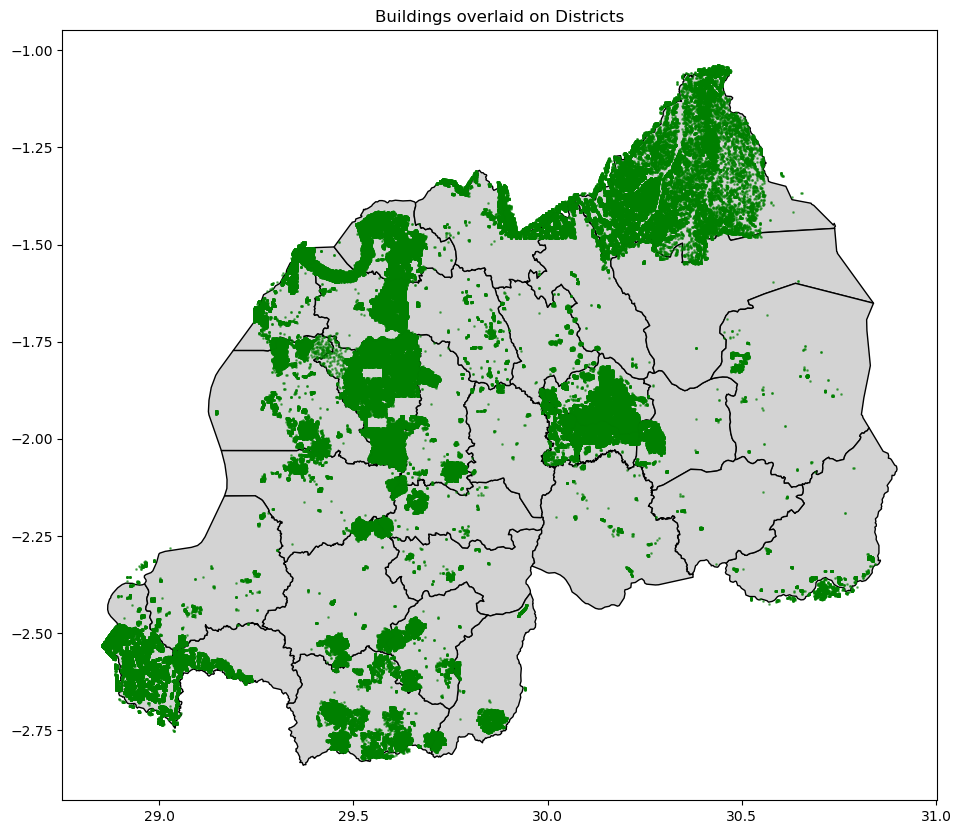

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 10))
gdf_districts.plot(ax=ax, color='lightgray', edgecolor='black')
gdf_buildings.plot(ax=ax, color='green', markersize=1, alpha=0.5)
plt.title('Buildings overlaid on Districts')
plt.show()

# EXPLORE GIS DATA JUST LIKE ANY OTHER REGULAR TABULAR DATA

In [8]:
gdf_districts.head()

,shapeName,shapeISO,shapeID,shapeGroup,shapeType,geometry
0,Nyarugenge,None,39286606B91255837333217,RWA,ADM2,"POLYGON ((30.07689 -1.95482, 30.0723 -1.95769,..."
1,Gasabo,None,39286606B27612515465928,RWA,ADM2,"POLYGON ((30.07689 -1.95482, 30.07321 -1.94367..."
2,Kicukiro,None,39286606B56607574087647,RWA,ADM2,"POLYGON ((30.08679 -2.06248, 30.08684 -2.06013..."
3,Nyanza,None,39286606B66592032419282,RWA,ADM2,"POLYGON ((29.98355 -2.23274, 29.98472 -2.23524..."
4,Gisagara,None,39286606B87181547360532,RWA,ADM2,"POLYGON ((29.84603 -2.45362, 29.85244 -2.45577..."


# SUBSET THE DATA-SELECT NYARUGENGE

In [ ]:
gdf_nyarugenge = gdf_districts[gdf_districts['shapeName'] == 'Nyarugenge']


<Axes: >

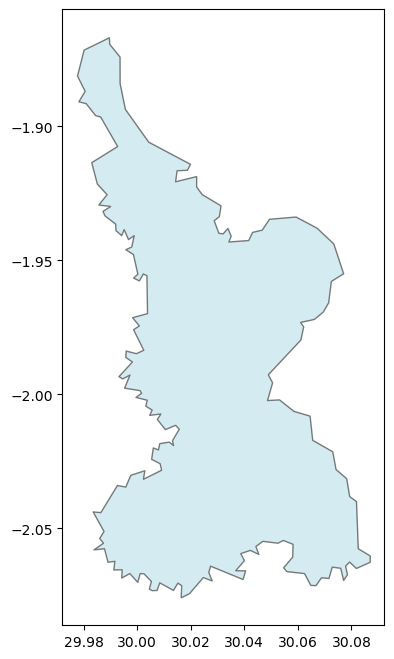

In [14]:
gdf_nyarugenge.plot(figsize=(8, 8), color='lightblue', edgecolor='black', alpha=0.5)

# SELECT ALL BUILDINGS IN NYARUGENGE

In [20]:
gdf_buildings.shape

(500000, 17)

In [15]:
gdf_nyarugenge_buildings = gpd.sjoin(gdf_buildings, gdf_nyarugenge, how='inner', predicate='within')

In [19]:
gdf_nyarugenge_buildings.shape[0]

18371

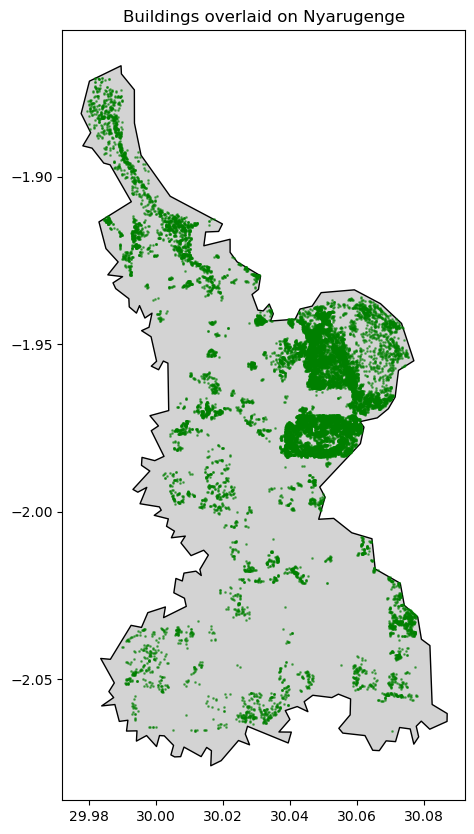

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))
gdf_nyarugenge.plot(ax=ax, color='lightgray', edgecolor='black')
gdf_nyarugenge_buildings.plot(ax=ax, color='green', markersize=1, alpha=0.5)
plt.title('Buildings overlaid on Nyarugenge')

plt.show()

# 